
# **Load Libraries**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
%matplotlib inline

# **Data Inspection and Preprocessing**

In [ ]:
data = pd.read_csv('car.csv')


data.head(3)

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [ ]:
data.tail(3)

,buying,maint,doors,persons,lug_boot,safety,car_acc
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_acc   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_acc'], dtype='object')

In [ ]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car_acc     0
dtype: int64

In [ ]:
data['car_acc'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: car_acc, dtype: int64

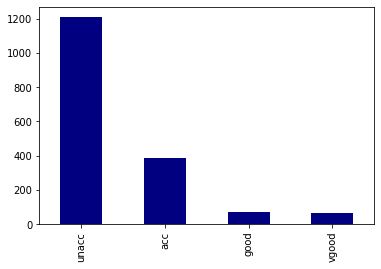

In [ ]:
data['car_acc'].value_counts().plot(kind = 'bar',color='navy')
plt.show()

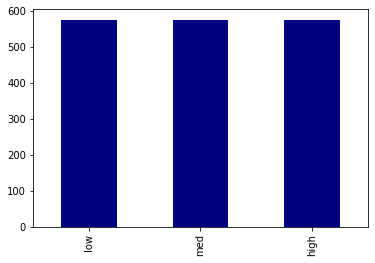

In [ ]:
data['safety'].value_counts().plot(kind = 'bar',color='navy')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


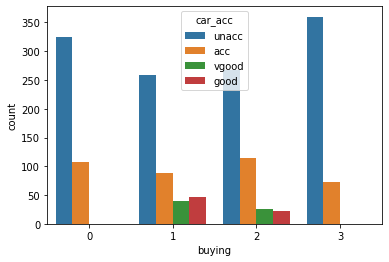

In [ ]:
import seaborn as sns

sns.countplot(data['buying'], hue = data['car_acc'])

plt.show()

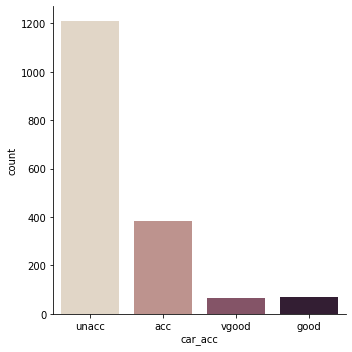

In [ ]:
sns.catplot(data=data, x="car_acc", kind="count", palette="ch:.25")

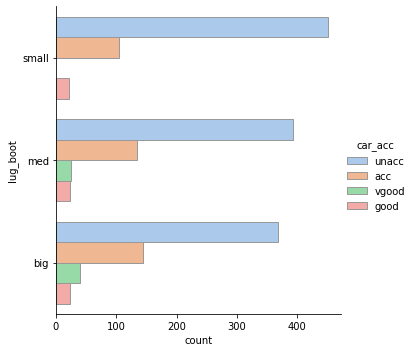

In [ ]:
#sns.catplot(data=data, y="car_acc", hue="car_acc", kind="count","pastel", edgecolor=".6",)
sns.catplot(
    data=data, y="lug_boot", hue="car_acc", kind="count",
    palette="pastel", edgecolor=".6",
)

In [ ]:
data.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
def label_encoder(y):
    le = LabelEncoder()
    data[y] = le.fit_transform(data[y])
label_list = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
for l in label_list:
    label_encoder(l)
data.head()

In [ ]:
data.tail(1)

In [ ]:
#Divide the dataset into independent and dependent variables
X = data.drop(['car_acc'], axis = 1)
y = data['car_acc']

In [ ]:
X.tail(1)

,buying,maint,doors,persons,lug_boot,safety
1727,1,1,3,2,0,0


In [ ]:


#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1382, 6)
X_test shape: (346, 6)
y_train shape: (1382, 1)
y_test shape: (346, 1)


# Models and results

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#To store results of models, we create three dictionaries
result_dict_train = {}
result_dict_test = {}
test_F1_score = {}

In [ ]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, np.ravel(y_train), cv=5)
reg.fit(X_train,np.ravel(y_train))
y_pred = reg.predict(X_test)

print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.6975487887825041
Test Score: 0.6676300578034682
F1 Score: 0.6211883528912969


In [ ]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)
test_F1_score["Logistic F1 Score"]=f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, np.ravel(y_train), cv=5)
knn.fit(X_train,np.ravel(y_train))
y_pred = knn.predict(X_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.9145921624025531
Test Score: 0.9046242774566474
F1 Score: 0.9025428705168099


In [ ]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)
test_F1_score["KNN F1 Score"]=f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train,np.ravel( y_train), cv=5)
svc.fit(X_train,np.ravel( y_train))
y_pred = svc.predict(X_test)



In [ ]:
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.8820200910375137
Test Score: 0.9017341040462428
F1 Score: 0.9007492395582191


In [ ]:

result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)
test_F1_score["SVM F1 Score"]=f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_split= 10,random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.9515172918955684
Test Score: 0.9335260115606936
F1 Score: 0.9377148881595457


In [ ]:
dtc1 = DecisionTreeClassifier()
accuracies = cross_val_score(dtc1, X_train, y_train, cv=5)
dtc1.fit(X_train,y_train)
y_pred = dtc1.predict(X_test)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc1.score(X_test,y_test))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.9775780882122115
Test Score: 0.9682080924855492
F1 Score: 0.9705270393773392


In [ ]:

result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)
test_F1_score["Decision Tree F1 Score"]=f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, np.ravel(y_train), cv=5)
rfc.fit(X_train,np.ravel(y_train))
y_pred = rfc.predict(X_test)
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.9739365876628472
Test Score: 0.9739884393063584
F1 Score: 0.9752422823939133


In [ ]:

result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)
test_F1_score["Random Forest F1 Score"]=f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, np.ravel(y_train), cv=5)
gnb.fit(X_train,np.ravel(y_train))
y_pred = gnb.predict(X_test)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))

Train Score: 0.6309658347721446
Test Score: 0.7052023121387283
F1 Score: 0.6990416551154309


In [ ]:

result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)
test_F1_score["Gaussian NB F1 Score"]=f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
import lightgbm as lg

In [ ]:
modellg1=lg.LGBMClassifier()

In [ ]:
accuracieslg1 = cross_val_score(modellg1, X_train, np.ravel(y_train), cv=5)
modellg1.fit(X_train,np.ravel(y_train))
y_pred_l1 = modellg1.predict(X_test)
print("Train Score:",np.mean(accuracieslg1))
print("Test Score:",modellg1.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred_l1, average='weighted', labels=np.unique(y_pred_l1)))

Train Score: 0.9898655365458066
Test Score: 0.8208092485549133
F1 Score: 0.8211688110177984


In [ ]:
result_dict_train["LightGBM Gradient Boosing Score"] = np.mean(accuracieslg1)
result_dict_test["LightGBM Gradient Boosing Test Score"] = modellg1.score(X_test,np.ravel(y_test))
test_F1_score["LightGBM Gradient Boosing F1 Score"]=f1_score(y_test, y_pred_l1, average='weighted', labels=np.unique(y_pred_l1))


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import catboost as cb

In [ ]:
modelc1=cb.CatBoostClassifier()

In [ ]:
modelc1=cb.CatBoostClassifier()
modelc1=cb.CatBoostClassifier(verbose=0)
accuraciesc1 = cross_val_score(modelc1, X_train, np.ravel(y_train), cv=5)
modelc1.fit(X_train,np.ravel(y_train))
y_pred_c1 = modelc1.predict(X_test)


### **Highest**

In [ ]:
print("Train Score:",np.mean(accuraciesc1))
print("Test Score:",modelc1.score(X_test,np.ravel(y_test)))
print("F1 Score:",f1_score(y_test, y_pred_c1, average='weighted', labels=np.unique(y_pred_c1)))

Train Score: 0.9942107466122533
Test Score: 0.9884393063583815
F1 Score: 0.9891858658718005


In [ ]:
result_dict_train["CatBoostClassifier Score"] = np.mean(accuraciesc1)
result_dict_test["CatBoostClassifier Test Score"] =modelc1.score(X_test,np.ravel(y_test))
test_F1_score["CatBoostClassifier F1 Score"]=f1_score(y_test, y_pred_c1, average='weighted', labels=np.unique(y_pred_c1))

In [ ]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.697549
KNN Train Score,0.914592
SVM Train Score,0.882020
Decision Tree Train Score,0.977578
Random Forest Train Score,0.973937
Gaussian NB Train Score,0.630966
LightGBM Gradient Boosing Score,0.989866
CatBoostClassifier Score,0.994211


In [ ]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test


,Score
Logistic Test Score,0.667630
KNN Test Score,0.904624
SVM Test Score,0.901734
Decision Tree Test Score,0.933526
Random Forest Test Score,0.973988
Gaussian NB Test Score,0.705202
LightGBM Gradient Boosing Test Score,0.820809
CatBoostClassifier Test Score,0.988439


In [ ]:
test_F1_score_results = pd.DataFrame.from_dict(test_F1_score,orient = "index",columns=["F1 Score"])
test_F1_score_results

,F1 Score
Logistic F1 Score,0.621188
KNN F1 Score,0.902543
SVM F1 Score,0.900749
Decision Tree F1 Score,0.970527
Random Forest F1 Score,0.975242
Gaussian NB F1 Score,0.699042
LightGBM Gradient Boosing F1 Score,0.821169
CatBoostClassifier F1 Score,0.989186


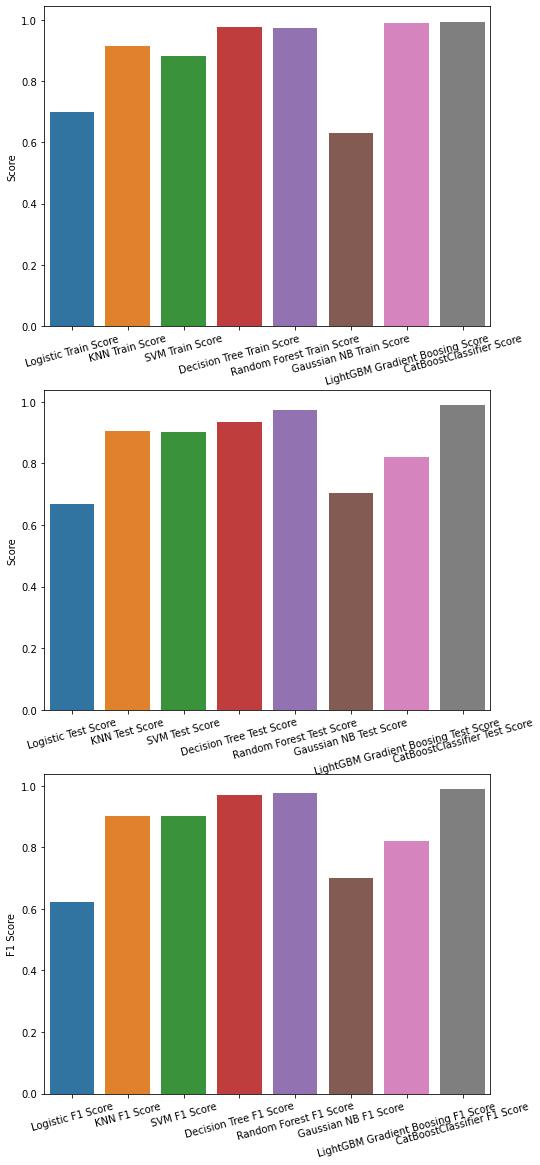

In [ ]:

fig,ax = plt.subplots(3,1,figsize=(8,20))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
sns.barplot(x = test_F1_score_results.index,y = test_F1_score_results["F1 Score"],ax = ax[2])
ax[0].set_xticklabels(df_result_train.index,rotation = 15)
ax[1].set_xticklabels(df_result_test.index,rotation = 15)
ax[2].set_xticklabels(test_F1_score_results.index,rotation = 15)

plt.show()

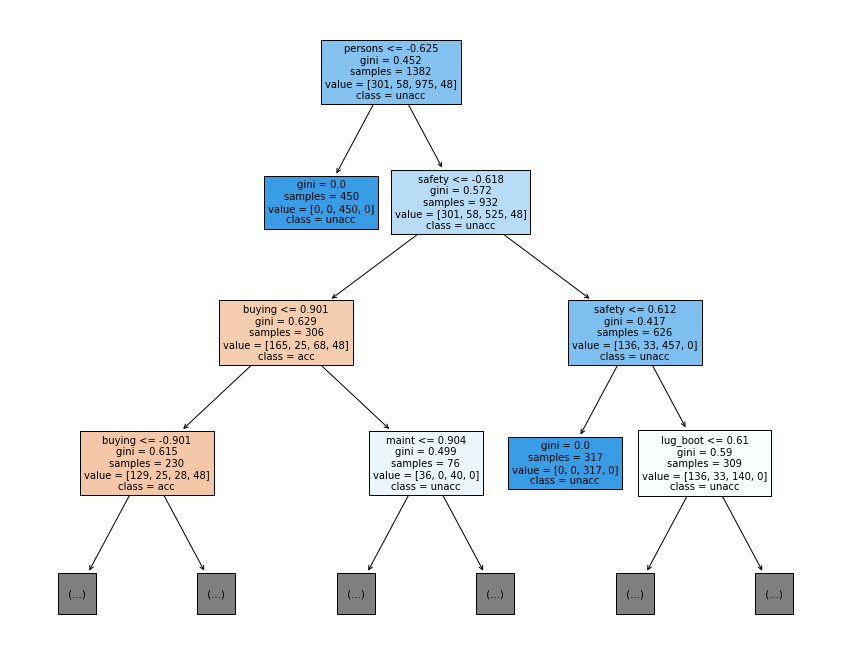

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(dtc,
feature_names=data.columns[:-1],
class_names= dtc.classes_, max_depth=3, filled=True)

# **Second Method For MY Method 21-FEB**

In [ ]:
df=pd.read_csv('car.csv')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
buying_price_category =['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category =['2', '4', 'more']
lug_boot_category =['small', 'med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)

In [ ]:
yy = df['car_acc']

In [ ]:
XX = oe.fit_transform( df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XX, yy, test_size = 0.2, random_state=42)

In [ ]:
#DT_classifier = DecisionTreeClassifier( criterion= 'gini', max_depth= 20, min_samples_split= 10,random_state=42)
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train1, y_train1)

DecisionTreeClassifier()

In [ ]:
y_pred1=DT_classifier.predict(X_test1)

In [ ]:
f1_score(y_test1, y_pred1, average='weighted', labels=np.unique(y_pred1))

0.9675080430472969

In [ ]:
rfc1 = RandomForestClassifier(random_state = 42)
accuraciesr = cross_val_score(rfc1, X_train1, np.ravel(y_train1), cv=5)
rfc1.fit(X_train1,np.ravel(y_train1))
y_pred_r = rfc1.predict(X_test1)
print("Train Score:",np.mean(accuraciesr))
print("Test Score:",rfc1.score(X_test1,np.ravel(y_test1)))
print("F1 Score:",f1_score(y_test1, y_pred_r, average='weighted', labels=np.unique(y_pred_r)))

Train Score: 0.9775650081096636
Test Score: 0.9624277456647399
F1 Score: 0.9646286764507737


In [ ]:
svc1 = SVC(random_state = 42)
accuracies1 = cross_val_score(svc1, X_train1,np.ravel( y_train1), cv=5)
svc1.fit(X_train1,np.ravel( y_train1))
y_pred1 = svc1.predict(X_test1)

In [ ]:
print("Train Score:",np.mean(accuracies1))
print("Test Score:",svc1.score(X_test1,np.ravel(y_test1)))
print("F1 Score:",f1_score(y_test1, y_pred1, average='weighted', labels=np.unique(y_pred1)))

Train Score: 0.9529665672578872
Test Score: 0.953757225433526
F1 Score: 0.9540987853030903


### **Highest Results**

In [ ]:
model=cb.CatBoostClassifier()

In [ ]:
accuraciesc = cross_val_score(model, X_train1, np.ravel(y_train1), cv=5)
model.fit(X_train1,np.ravel(y_train1))
y_pred_c = model.predict(X_test1)


In [ ]:
print("Train Score:",np.mean(accuraciesc))
print("Test Score:",model.score(X_test1,np.ravel(y_test1)))
print("F1 Score:",f1_score(y_test1, y_pred_c, average='weighted', labels=np.unique(y_pred_c)))

Train Score: 0.9934913409721131
Test Score: 0.9855491329479769
F1 Score: 0.986261643128908


In [ ]:
modellg=lg.LGBMClassifier()

In [ ]:
accuracieslg = cross_val_score(modellg, X_train1, np.ravel(y_train1), cv=5)
modellg.fit(X_train1,np.ravel(y_train1))
y_pred_c = modellg.predict(X_test1)
print("Train Score:",np.mean(accuracieslg))
print("Test Score:",modellg.score(X_test1,np.ravel(y_test1)))
print("F1 Score:",f1_score(y_test1, y_pred_c, average='weighted', labels=np.unique(y_pred_c)))

Train Score: 0.9884188772039973
Test Score: 0.9826589595375722
F1 Score: 0.9836833835058506


# **Encoding as Our lab**

In [ ]:
data1=pd.read_csv('car.csv')

In [ ]:
buyingMapping = {"low": 1, "med": 2, "high": 3, "vhigh": 4}
data1["buying"] = data1["buying"].map(buyingMapping)

maintMapping = {"low": 1, "med": 2, "high": 3, "vhigh": 4}
data1["maint"] = data1["maint"].map(maintMapping)

doorsMapping = {"2": 2, "3": 3, "4": 4, "5more": 5}
data1["doors"] = data1["doors"].map(doorsMapping)

personsMapping = {"2": 2, "4": 4, "more": 6}
data1["persons"] = data1["persons"].map(personsMapping)

lugBootMapping = {"small": 1, "med": 2, "big": 3}
data1["lug_boot"] = data1["lug_boot"].map(lugBootMapping)

safetyMapping = {"low": 1, "med": 2, "high": 3}
data1["safety"] = data1["safety"].map(safetyMapping)

In [ ]:
X1 = data1.drop(['car_acc'], axis = 1)

In [ ]:
y1=data1['car_acc']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [ ]:
#DT_classifier1 = DecisionTreeClassifier( criterion= 'gini', max_depth= 20, min_samples_split= 10,random_state = 42) # F score =93 
DT_classifier1 = DecisionTreeClassifier()
DT_classifier1.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [ ]:
y_pred2 = DT_classifier1.predict(X_test2)

In [ ]:
accuraciesDT = cross_val_score(DT_classifier1, X_train2, np.ravel(y_train2), cv=5)
DT_classifier1.fit(X_train2,np.ravel(y_train2))
y_pred2 = DT_classifier1.predict(X_test2)
print("Train Score:",np.mean(accuraciesDT))
print("Test Score:",DT_classifier1.score(X_test2,np.ravel(y_test2)))
print("F1 Score:",f1_score(y_test2, y_pred2, average='weighted', labels=np.unique(y_pred2)))

Train Score: 0.9688798200177888
Test Score: 0.9653179190751445
F1 Score: 0.9675080430472969


In [ ]:
svc2 = SVC()
accuracies2 = cross_val_score(svc2, X_train2,np.ravel( y_train2), cv=5)
svc2.fit(X_train2,np.ravel( y_train2))
y_pred2s = svc.predict(X_test2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
print("Train Score:",np.mean(accuracies2))
print("Test Score:",svc2.score(X_test2,np.ravel(y_test2)))
print("F1 Score:",f1_score(y_test2, y_pred2s, average='weighted', labels=np.unique(y_pred2s)))

Train Score: 0.9327081044315386
Test Score: 0.9479768786127167
F1 Score: 0.8089500860585197


In [ ]:
modellg1=lg.LGBMClassifier()

In [ ]:
accuracieslg1 = cross_val_score(modellg1, X_train2, np.ravel(y_train2), cv=5)
modellg1.fit(X_train2,np.ravel(y_train2))
y_pred_c1 = modellg1.predict(X_test2)
print("Train Score:",np.mean(accuracieslg1))
print("Test Score:",modellg1.score(X_test2,np.ravel(y_test2)))
print("F1 Score:",f1_score(y_test2, y_pred_c1, average='weighted', labels=np.unique(y_pred_c1)))

Train Score: 0.9884188772039973
Test Score: 0.9826589595375722
F1 Score: 0.9836833835058506
